# Introdução à Ciência de Dados - UFPB
Professor: Yuri Malheiros  
Aluno: João Victor Alcoforado de Araújo  
Matrícula: 20180083830

## Regressão Linear - Exercício

Utilizando o dataset dos filmes, aplique a regressão linear para predizer o `US Gross` de acordo com o `Production Budget`.

Primeiro carregue os dados:

In [2]:
import pandas as pd
from scipy.stats import linregress

In [3]:
movies = pd.read_csv('https://raw.githubusercontent.com/yurimalheiros/icd/master/datasets/movies.csv')
movies = movies[['Title', 'US Gross', 'Production Budget']]
movies.head()

,Title,US Gross,Production Budget
0,The Land Girls,146083.0,8000000.0
1,"First Love, Last Rites",10876.0,300000.0
2,I Married a Strange Person,203134.0,250000.0
3,Let's Talk About Sex,373615.0,300000.0
4,Slam,1009819.0,1000000.0


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              3200 non-null   object 
 1   US Gross           3194 non-null   float64
 2   Production Budget  3200 non-null   float64
dtypes: float64(2), object(1)
memory usage: 75.1+ KB


In [5]:
movies = movies.dropna()

Visualize os dados com um gráfico de dispersão:

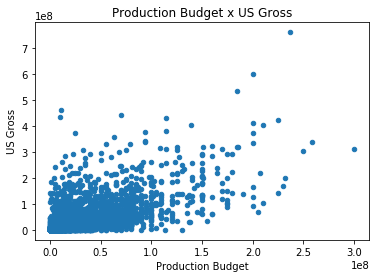

In [6]:
movies.plot.scatter(x='Production Budget', y='US Gross', title= 'Production Budget x US Gross')

Use a regressão linear para encontrar os coeficientes a e b:

In [7]:
reg = linregress(movies['Production Budget'], movies['US Gross'])

Utilize a função `show_regression` abaixo para visualizar o resultado da regressão linear. Nesta função, você deve passar as coordenadas x dos pontos, as coordenadas y, o coeficiente a e o coeficiente b.

In [8]:
#### NÃO ALTERAR ESSE CÓDIGO ####

import matplotlib.pyplot as plt

def gen_line(x_min, x_max, n_points, a, b):
    interval = x_max-x_min
    interval_value = interval/n_points
    
    x_result = []
    y_result = []

    for i in range(n_points):
        current_x = x_min+i*interval_value
        x_result.append(current_x)
        y_result.append(a*current_x + b)
        
    return x_result, y_result

def show_regression(x, y, a, b):
    N = 100

    plt.scatter(x, y)

    line_1 = gen_line(min(x), max(x), N, a, b)
    plt.plot(line_1[0], line_1[1], c= "red")

    plt.gca()
    plt.show()

Exemplo de uso da função:

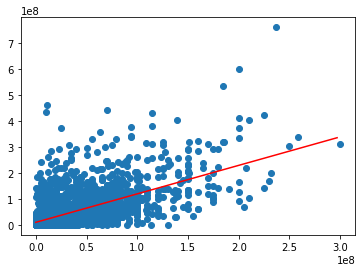

In [9]:
show_regression(movies["Production Budget"], movies["US Gross"], reg.slope, reg.intercept)

A função `predict` recebe um production budget de um filme e retorna a predição do US Gross para ele:

In [10]:
def predict(production_budget):
    """
    >>> f'{predict(100000):.2f}'
    '10006058.40'
    
    >>> f'{predict(1000000):.2f}'
    '10992208.78'

    >>> f'{predict(5000000):.2f}'
    '15375099.37'
    """
    return production_budget*reg.slope + reg.intercept

## Teste

In [11]:
import doctest

doctest.testmod(verbose=True)

Trying:
    f'{predict(100000):.2f}'
Expecting:
    '10006058.40'
**********************************************************************
File "__main__", line 3, in __main__.predict
Failed example:
    f'{predict(100000):.2f}'
Expected:
    '10006058.40'
Got:
    '10013350.04'
Trying:
    f'{predict(1000000):.2f}'
Expecting:
    '10992208.78'
**********************************************************************
File "__main__", line 6, in __main__.predict
Failed example:
    f'{predict(1000000):.2f}'
Expected:
    '10992208.78'
Got:
    '10999415.45'
Trying:
    f'{predict(5000000):.2f}'
Expecting:
    '15375099.37'
**********************************************************************
File "__main__", line 9, in __main__.predict
Failed example:
    f'{predict(5000000):.2f}'
Expected:
    '15375099.37'
Got:
    '15381928.42'
3 items had no tests:
    __main__
    __main__.gen_line
    __main__.show_regression
**********************************************************************
1 ite

TestResults(failed=3, attempted=3)